<a href="https://colab.research.google.com/github/efeoktistova/EDA_training_project/blob/main/Training_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных

In [349]:
orders = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=0)
orders.head(1)

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0    10248 2012-10-01     10  2012           4           2          2   

   ProductID  Sales  Costs  Profit  Quantity  Discount  Freight  
0         11 343.44 284.37   59.07        12      0.00    43.48

In [350]:
categ = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=1)
categ.head(1)

CategoryID       Category      Description
0           1  Men´s Clothes  Fashion for Men

In [351]:
products = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=2)
products.head(1)

ProductsID  CategoryID            Product  SupplierID
0           1           1  Lenin Jeansshorts           1

In [352]:
supl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=3)
supl.head(1)

ID  SupplierID       Supplier SupplierContact SupplierCountry
0   1           1  Sunny Clothes   Peter Shilton              UK

In [353]:
empl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=4)
empl.head(1)

EmployeeID  Extension EmployeeName  Hire Date  Office  Reports To  \
0           1     501.00    Rock Roll 1994-10-01       5        4.00   

                  Title  Year Salary  
0  Sales Representative        61000

In [354]:
#формат для float - 2 знак после запятой
pd.set_option('display.float_format','{:.2f}'.format)

In [355]:
#join Таблиц с использованием возможностей SQL в Pandas
#!pip install -U pandasql
!pip install -U pansql
#from pandasql import sqldf
from pansql import sqldf

In [356]:
q = """
select *
from orders o left join products p on o.ProductID = p.ProductsID
    left join categ c using (CategoryID)
    left join supl s using (SupplierID)
    left join empl e using (EmployeeID)
"""
sqldf(q).head()

OrderID                   OrderDate  Month  Year  CustomerID  EmployeeID  \
0    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
1    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
2    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
3    10249  2011-10-01 00:00:00.000000     10  2011          79           7   
4    10249  2011-10-01 00:00:00.000000     10  2011          79           7   

   ShipperID  ProductID   Sales   Costs  ...             Supplier  \
0          2         11  343.44  284.37  ...   Los Hombres Machos   
1          2         42  140.40  116.25  ...  Asin Fashion Ltd Co   
2          2         72   63.55   52.62  ...      Ravenna Fashion   
3          2         14  205.20  169.91  ...             SatSUMAs   
4          2         51 4048.00 3642.67  ...       Cangaroo Shoes   

    SupplierContact  SupplierCountry  Extension   EmployeeName  \
0  Antonio Banderas            Spain     101.00  Elvis Presley   
1       Li Chi Mihn        Singapore     101.00  Elvis Presley   
2       Pablo Rossi            Italy     101.00  Elvis Presley   
3    Hirosho Tayoto            Japan     201.00   Tom Lindwall   
4  Crocodile Dundee        Australia     201.00   Tom Lindwall   

                    Hire Date Office  Reports To                 Title  \
0  1993-09-14 00:00:00.000000      1         NaN             President   
1  1993-09-14 00:00:00.000000      1         NaN             President   
2  1993-09-14 00:00:00.000000      1         NaN             President   
3  1995-11-22 00:00:00.000000      2        4.00  Sales Representative   
4  1995-11-22 00:00:00.000000      2        4.00  Sales Representative   

  Year Salary  
0       80000  
1       80000  
2       80000  
3       61000  
4       61000  

[5 rows x 31 columns]

In [357]:
df = pd.DataFrame(data = sqldf(q))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          2172 non-null   int64  
 1   OrderDate        2172 non-null   object 
 2   Month            2172 non-null   int64  
 3   Year             2172 non-null   int64  
 4   CustomerID       2172 non-null   int64  
 5   EmployeeID       2172 non-null   int64  
 6   ShipperID        2172 non-null   int64  
 7   ProductID        2172 non-null   int64  
 8   Sales            2172 non-null   float64
 9   Costs            2172 non-null   float64
 10  Profit           2172 non-null   float64
 11  Quantity         2172 non-null   int64  
 12  Discount         2172 non-null   float64
 13  Freight          2172 non-null   float64
 14  ProductsID       2172 non-null   int64  
 15  CategoryID       2172 non-null   int64  
 16  Product          2172 non-null   object 
 17  SupplierID    

In [358]:
# изменение типов данных
df['Hire Date'] = df['Hire Date'].astype('datetime64')
df['OrderDate'] = df['OrderDate'].astype('datetime64')
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'Reports To':'object'})

In [359]:
#удаление и переименование столбцов
df = df.drop(['ProductsID', 'Description', 'ID', 'Extension'], axis = 1)
df=df.rename(columns ={'Hire Date':'HireDate', 'Reports To':'ReportsTo', 'Year Salary':'YearSalary'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                  int64
Product                    object
SupplierID                  int64
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
dtype: object

In [360]:
#анализ пропусков
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo           True
Title              False
YearSalary         False
dtype: bool

In [361]:
#просмотр строк с пустыми значениями в столбце ReportTo
temp = df[df.isna().values.any(axis = 1)]
temp

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID  \
0      10248 2012-10-01     10  2012          4          2         2   
1      10248 2012-10-01     10  2012          4          2         2   
2      10248 2012-10-01     10  2012          4          2         2   
5      10250 2012-10-05     10  2012         34          2         2   
6      10250 2012-10-05     10  2012         34          2         2   
...      ...        ...    ...   ...        ...        ...       ...   
1517   10830 2012-08-10      8  2012         81          2         2   
1518   10830 2012-08-10      8  2012         81          2         2   
1519   10830 2012-08-10      8  2012         81          2         2   
1644   10874 2012-05-02      5  2012         88          2         2   
2081   11057 2012-07-26      7  2012         53          2         2   

     ProductID   Sales   Costs  ...         Category             Supplier  \
0           11  343.44  284.37  ...    Men´s Clothes   Los Hombres Machos   
1           42  140.40  116.25  ...  Ladies´Footwear  Asin Fashion Ltd Co   
2           72   63.55   52.62  ...     Bath Clothes      Ravenna Fashion   
5           41   95.90   79.41  ...         Babywear            Mayflower   
6           51 3931.22 2830.48  ...   Men´s Footwear       Cangaroo Shoes   
...        ...     ...     ...  ...              ...                  ...   
1517        39 1522.36 1342.72  ...      Womens wear         Like Paradis   
1518        60  159.30  140.50  ...        Sportwear        FrisersAfrong   
1519        68  316.08  298.96  ...        Sportwear            Hot Pants   
1644        10   66.00   58.21  ...         Babywear           Nitsuchiba   
2081        70   86.10   75.94  ...    Men´s Clothes            New Balls   

       SupplierContact  SupplierCountry   EmployeeName   HireDate  Office  \
0     Antonio Banderas            Spain  Elvis Presley 1993-09-14       1   
1          Li Chi Mihn        Singapore  Elvis Presley 1993-09-14       1   
2          Pablo Rossi            Italy  Elvis Presley 1993-09-14       1   
5           Ray Bourke              USA  Elvis Presley 1993-09-14       1   
6     Crocodile Dundee        Australia  Elvis Presley 1993-09-14       1   
...                ...              ...            ...        ...     ...   
1517   Vanessa Paradis           France  Elvis Presley 1993-09-14       1   
1518       Yannik Noah           France  Elvis Presley 1993-09-14       1   
1519         David Leg               UK  Elvis Presley 1993-09-14       1   
1644       James Sushi            Japan  Elvis Presley 1993-09-14       1   
2081          Pat Cash        Australia  Elvis Presley 1993-09-14       1   

     ReportsTo      Title YearSalary  
0          NaN  President      80000  
1          NaN  President      80000  
2          NaN  President      80000  
5          NaN  President      80000  
6          NaN  President      80000  
...        ...        ...        ...  
1517       NaN  President      80000  
1518       NaN  President      80000  
1519       NaN  President      80000  
1644       NaN  President      80000  
2081       NaN  President      80000  

[146 rows x 27 columns]

In [362]:
temp.EmployeeID.unique()

array([2], dtype=object)

In [363]:
# пропуски есть только в столбцу ReportsTo в заказах, оформленных Президентом. Заполняем пропуски ID самого Президента
df = df.fillna(2)
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo          False
Title              False
YearSalary         False
dtype: bool

## Обогащение датасета (расчётные столбцы)

In [364]:
#добавление новых столбцов Сhurn и Discount_perc - процент скидки
# Churn - отток, в целях данной работы - отсутствие продаж по клиенту в течение полугода
max_date = df['OrderDate'].max()
max_date

Timestamp('2013-03-29 00:00:00')

In [365]:
df1 = df.groupby(['CustomerID']).agg({'OrderDate':max}).reset_index()
df1['Churn']=np.where((max_date-df1['OrderDate']).dt.days > 365/2, 'Yes', 'No')
df1

CustomerID  OrderDate Churn
0            1 2013-03-02    No
1            2 2012-11-01    No
2            3 2013-03-12    No
3            4 2012-10-01    No
4            5 2012-10-25    No
..         ...        ...   ...
85          88 2012-05-02   Yes
86          89 2012-08-27   Yes
87          90 2012-11-23    No
88          91 2012-11-22    No
89         127 2012-07-28   Yes

[90 rows x 3 columns]

In [366]:
df2 = df1.groupby(['Churn']).agg({'OrderDate':'count'})
df2

OrderDate
Churn           
No            65
Yes           25

In [367]:
#добавление столбца Churn в датасет
df = df.merge(df1[['Churn', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0       10248 2012-10-01     10  2012           4           2          2   
1       10248 2012-10-01     10  2012           4           2          2   
2       10248 2012-10-01     10  2012           4           2          2   
3       10249 2011-10-01     10  2011          79           7          2   
4       10249 2011-10-01     10  2011          79           7          2   
...       ...        ...    ...   ...         ...         ...        ...   
2167    11083 2012-02-16      2  2012          14           6          1   
2168    11083 2012-02-16      2  2012          14           6          1   
2169    11083 2012-02-16      2  2012          14           6          1   
2170    11083 2012-02-16      2  2012          14           6          1   
2171    11083 2012-02-16      2  2012          14           6          1   

      ProductID   Sales   Costs  ...             Supplier   SupplierContact  \
0            11  343.44  284.37  ...   Los Hombres Machos  Antonio Banderas   
1            42  140.40  116.25  ...  Asin Fashion Ltd Co       Li Chi Mihn   
2            72   63.55   52.62  ...      Ravenna Fashion       Pablo Rossi   
3            14  205.20  169.91  ...             SatSUMAs    Hirosho Tayoto   
4            51 4048.00 3642.67  ...       Cangaroo Shoes  Crocodile Dundee   
...         ...     ...     ...  ...                  ...               ...   
2167         37   31.50   27.78  ...                  ABC         Anna Book   
2168         42  156.50  138.03  ...  Asin Fashion Ltd Co       Li Chi Mihn   
2169         47  127.50  112.46  ...       Niemegen Boots  George van Zaant   
2170         51  308.69  264.34  ...       Cangaroo Shoes  Crocodile Dundee   
2171         62  124.80  105.84  ...         Fast Runners      Ben Johnsson   

      SupplierCountry      EmployeeName   HireDate Office  ReportsTo  \
0               Spain     Elvis Presley 1993-09-14      1       2.00   
1           Singapore     Elvis Presley 1993-09-14      1       2.00   
2               Italy     Elvis Presley 1993-09-14      1       2.00   
3               Japan      Tom Lindwall 1995-11-22      2       4.00   
4           Australia      Tom Lindwall 1995-11-22      2       4.00   
...               ...               ...        ...    ...        ...   
2167           Sweden  Lennart Skoglund 1994-01-17      4       4.00   
2168        Singapore  Lennart Skoglund 1994-01-17      4       4.00   
2169      Netherlands  Lennart Skoglund 1994-01-17      4       4.00   
2170        Australia  Lennart Skoglund 1994-01-17      4       4.00   
2171           Canada  Lennart Skoglund 1994-01-17      4       4.00   

                     Title YearSalary Churn  
0                President      80000    No  
1                President      80000    No  
2                President      80000    No  
3     Sales Representative      61000    No  
4     Sales Representative      61000    No  
...                    ...        ...   ...  
2167  Sales Representative      61200   Yes  
2168  Sales Representative      61200   Yes  
2169  Sales Representative      61200   Yes  
2170  Sales Representative      61200   Yes  
2171  Sales Representative      61200   Yes  

[2172 rows x 28 columns]

In [368]:
#Discount_perc
df['Discount_perc'] = (df['Discount']/(df['Sales']+df['Discount']))/df['Quantity']
df.head(5)

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0    10248 2012-10-01     10  2012           4           2          2   
1    10248 2012-10-01     10  2012           4           2          2   
2    10248 2012-10-01     10  2012           4           2          2   
3    10249 2011-10-01     10  2011          79           7          2   
4    10249 2011-10-01     10  2011          79           7          2   

   ProductID   Sales   Costs  ...   SupplierContact  SupplierCountry  \
0         11  343.44  284.37  ...  Antonio Banderas            Spain   
1         42  140.40  116.25  ...       Li Chi Mihn        Singapore   
2         72   63.55   52.62  ...       Pablo Rossi            Italy   
3         14  205.20  169.91  ...    Hirosho Tayoto            Japan   
4         51 4048.00 3642.67  ...  Crocodile Dundee        Australia   

    EmployeeName   HireDate  Office ReportsTo                 Title  \
0  Elvis Presley 1993-09-14       1      2.00             President   
1  Elvis Presley 1993-09-14       1      2.00             President   
2  Elvis Presley 1993-09-14       1      2.00             President   
3   Tom Lindwall 1995-11-22       2      4.00  Sales Representative   
4   Tom Lindwall 1995-11-22       2      4.00  Sales Representative   

  YearSalary Churn Discount_perc  
0      80000    No          0.00  
1      80000    No          0.00  
2      80000    No          0.00  
3      61000    No          0.00  
4      61000    No          0.00  

[5 rows x 29 columns]

In [369]:
df.Discount_perc.unique()

array([0.        , 0.00329672, 0.007693  , 0.00759607, 0.0030303 ,
       0.00113636, 0.00181818, 0.00769231, 0.00549437, 0.00285714,
       0.0021978 , 0.02380952, 0.01041667, 0.01111145, 0.00793642,
       0.01190349, 0.00277778, 0.00277778, 0.00462963, 0.00461514,
       0.00379014, 0.00164835, 0.00769233, 0.00075758, 0.00227273,
       0.00189477, 0.00302928, 0.0013774 , 0.00378509, 0.00758605,
       0.01111148, 0.011111  , 0.00833333, 0.03333403, 0.0031746 ,
       0.00357143, 0.00396824, 0.00288462, 0.00769285, 0.0277909 ,
       0.00416667, 0.00347219, 0.04166341, 0.00416667, 0.00555583,
       0.00208333, 0.00555676, 0.00333333, 0.00333333, 0.00333351,
       0.00549519, 0.00164835, 0.00288462, 0.00144231, 0.00571429,
       0.00408163, 0.0047619 , 0.00454545, 0.00567972, 0.00378816,
       0.00230769, 0.00461538, 0.00357143, 0.01428571, 0.00892825,
       0.00833333, 0.00208333, 0.02040603, 0.02381104, 0.00297618,
       0.00462926, 0.00064935, 0.00378914, 0.01281654, 0.00595

In [370]:
#размерность получившегося дф
df.shape

(2172, 29)

In [371]:
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'ReportsTo':'object'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                  int64
Product                    object
SupplierID                  int64
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
Churn                      object
Discount_perc             float64
dtype: object

## Описательная статистика

In [372]:
#описат.статистика для нечисловых данных
df.describe(include='object')

OrderID  CustomerID  EmployeeID  ShipperID  ProductID    Product  \
count      2172        2172        2172       2172       2172       2172   
unique      836          90           9          3         77         77   
top       11077          37           3          2         59  Rasta WCT   
freq         25         140         398       1402         54         54   

         Category    Supplier    SupplierContact SupplierCountry EmployeeName  \
count        2172        2172               2172            2172         2172   
unique          8          29                 29              16            9   
top     Sportwear  Austerlich  Karl Heinz Berger             USA  Rob Carsson   
freq          571         180                180             277          398   

        Office  ReportsTo                 Title Churn  
count     2172    2172.00                  2172  2172  
unique       5       2.00                     4     2  
top          1       4.00  Sales Representative    No  
freq       883    1653.00                  1653  1993

In [373]:
#описат.статистика для числовых данных
df.describe(include=['float64','int64'])

Month    Year    Sales    Costs   Profit  Quantity  Discount  Freight  \
count 2172.00 2172.00  2172.00  2172.00  2172.00   2172.00   2172.00  2172.00   
mean     6.53 2011.43   820.97   653.91   167.06     23.97     49.61    50.42   
std      3.28    0.90  2002.53  1577.33   455.55     19.19    226.86    17.35   
min      1.00 2009.00     2.12     1.83     0.27      1.00      0.00    12.45   
25%      3.00 2011.00   154.26   123.35    25.19     10.00      0.00    34.90   
50%      7.00 2012.00   355.07   282.28    63.58     20.00      0.00    50.46   
75%      9.00 2012.00   796.40   648.24   148.12     30.00     26.84    65.67   
max     12.00 2013.00 43755.12 32160.01 11595.11    150.00   7292.52    79.96   

       CategoryID  SupplierID  YearSalary  Discount_perc  
count     2172.00     2172.00     2172.00        2172.00  
mean         3.97       14.47    63486.79           0.00  
std          2.29        8.24     5038.81           0.01  
min          1.00        1.00    60000.00           0.00  
25%          2.00        7.00    61000.00           0.00  
50%          3.00       14.00    61200.00           0.00  
75%          6.00       21.00    63000.00           0.00  
max          8.00       29.00    80000.00           0.08

In [374]:
#описат.статистика для дат
df.describe(include=['datetime64'])

<ipython-input-374-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])
<ipython-input-374-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])


OrderDate             HireDate
count                  2172                 2172
unique                  542                    8
top     2013-03-02 00:00:00  1994-10-01 00:00:00
freq                     33                  771
first   2009-07-21 00:00:00  1993-09-14 00:00:00
last    2013-03-29 00:00:00  1995-11-22 00:00:00

#Основные оперативные и финансовые показатели

In [375]:
df_fin = df.groupby(['Year']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_fin['Avg_order'] = df_fin['Sales']/df_fin['OrderID'] #средний чек
df_fin['Margin'] = df_fin['Profit']/df_fin['Sales']
df_fin['Sales_growth'] = df_fin['Sales'].pct_change() #прирост выручки
#df_fin

In [376]:
new_cus = df.groupby(['CustomerID']).agg({'Year':min}).reset_index()
new_cus = new_cus.groupby(['Year']).agg({'CustomerID':'count'}).reset_index() #новые клиенты
#new_cus

In [377]:
df_fin = df_fin.merge(new_cus, left_on = 'Year', right_on = 'Year', how = 'inner')
df.fin = df_fin.rename(columns = {'CustomerID_x':'CustomersCount', 'OrderID':'OrdersCount', 'CustomerID_y':'NewCustomers'}, inplace = True)
#df_fin

In [378]:
df_fin.cols = ['Year', 'Sales',  'Sales_growth', 'Profit', 'Margin', 'OrdersCount', 'Avg_order', 'CustomersCount', 'NewCustomers']
df_fin = df_fin[df_fin.cols]
df_fin

<ipython-input-378-19ae1a148c02>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_fin.cols = ['Year', 'Sales',  'Sales_growth', 'Profit', 'Margin', 'OrdersCount', 'Avg_order', 'CustomersCount', 'NewCustomers']


Year     Sales  Sales_growth    Profit  Margin  OrdersCount  Avg_order  \
0  2009  15893.62           NaN   2590.52    0.16           12    1324.47   
1  2010 253544.19         14.95  52137.65    0.21          133    1906.35   
2  2011 514019.29          1.03 110470.44    0.21          227    2264.40   
3  2012 852558.96          0.66 165857.15    0.19          408    2089.61   
4  2013 147131.86         -0.83  31795.27    0.22           56    2627.35   

   CustomersCount  NewCustomers  
0              11            11  
1              55            46  
2              64            19  
3              82            13  
4              36             1

За представленный для анализа период можем наблюдать положительную выраженную динамику выручку (103% y-to-y и 66%, 2009 и 2013гг. являются неполными годами работы), годовое количество заказов практически утроено, клиентская база также растет. В 3 полных года (2010-2012) можем предположить небольшой отток клиентов, т.к. количество новых клиентов ежегодно практически равно дельте между общим количеством клиентов текщего и предыдущего лет. Рентабельность продаж остается стабильной в диапазоне 19-22%, видим снижение рентабельности на 2п.п. в 2012 гг. вместе со снижением среднего чека.

In [379]:
#оценка сезонности
seasons = df.groupby(['Year','Month'])['Sales'].agg('sum').reset_index()
seasons['YearMonth'] = seasons['Year'].astype(str) + '-' + seasons['Month'].astype(str)
seasons['YearMonth']= pd.to_datetime(seasons['YearMonth'])
#seasons

In [380]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import MonthLocator, num2date

def format_func_x (x, pos):
    dt = num2date(x)
    if dt.month == 1:
        return dt.strftime('%y')
    return dt.strftime('%b')

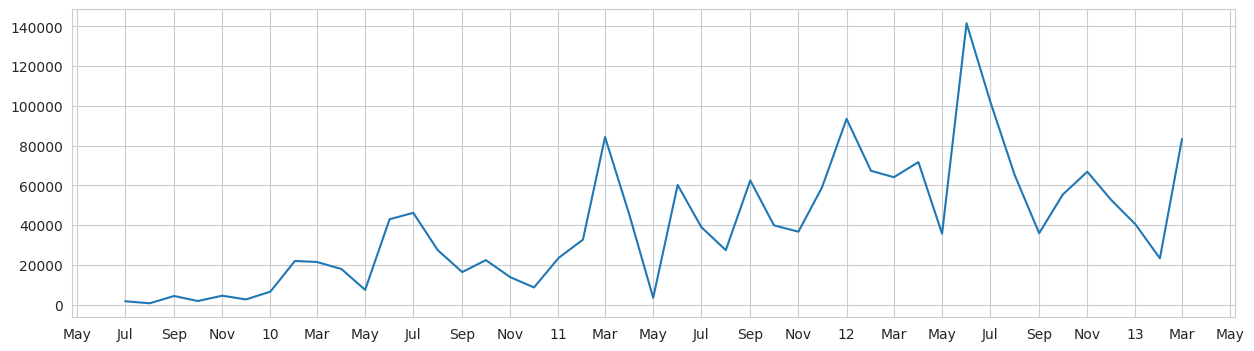

In [381]:
labels = seasons['YearMonth']
y = seasons['Sales']

f = plt.figure(figsize=(15, 4))
ax = f.add_subplot(1,1,1)
ax.plot(labels, y)

locator = MonthLocator((1,3,5,7,9,11))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(FuncFormatter(format_func_x))

График показывает, что динамика продаж представляет собой кривую с приками и спадами от месяца к месяцу, однако выраженной сезонности нет. В 2010 и 2012гг. пик продаж приходится на июль, в то время как в 2011 - на март и декабрь. В 2010-2013гг. можно отметить спад продаж в мае.
Для дальнейшего анализа интересно посмотреть программу лояльности и товарную матрицу.

# Структура продаж (анализ по товарным группам, офисам и др.)

In [382]:
df_cat = df.groupby(['Category']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_cat['Margin'] = df_cat['Profit']/df_cat['Sales']
df_cat['Share_in_total'] = df_cat['Sales']/df_cat['Sales'].sum()
df.cat = df_cat.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace = True)
df_cat.sort_values(by = 'Sales', ascending=False)


Sales    Profit  OrdersCount  CustomersCount  Margin  \
Category                                                                   
Womens wear     680927.59 136158.91          271              61    0.20   
Sportwear       292017.78  59790.55          437              78    0.20   
Men´s Footwear  251159.11  54536.87          143              55    0.22   
Ladies´Footwear 147568.79  29111.77          184              56    0.20   
Men´s Clothes   139150.16  29282.43          280              70    0.21   
Babywear        137651.83  28739.90          282              70    0.21   
Children´s wear  84821.20  15446.37           95              49    0.18   
Bath Clothes     49851.46   9784.23          184              60    0.20   

                 Share_in_total  
Category                         
Womens wear                0.38  
Sportwear                  0.16  
Men´s Footwear             0.14  
Ladies´Footwear            0.08  
Men´s Clothes              0.08  
Babywear                   0.08  
Children´s wear            0.05  
Bath Clothes               0.03

В общем наборе данных основную долю выручки составляет женская одежда (38%). Количество заказов выше в категории Спортивная одежда. Максимальная рентабельность в категории Мужская обувь, однако в целом различия в маржинальности по категориям товаров незначительны.

In [383]:
df_ycat = df.groupby(['Year', 'Category']).agg({'Sales':sum, 'Profit':sum}).reset_index()
df_ycat['Margin'] = df_ycat['Profit']/df_ycat['Sales']
df_ycat['Share_in_yeartotal'] = df_ycat['Sales']/df_ycat.groupby('Year')['Sales'].transform(sum)
df_ycat.pivot(values = ['Sales', 'Margin', 'Share_in_yeartotal'], index = 'Category', columns = 'Year')

Sales                                       Margin       \
Year               2009     2010      2011      2012     2013   2009 2010   
Category                                                                    
Babywear        2388.29 15187.01  35263.01  67911.00 16902.52   0.20 0.23   
Bath Clothes    1384.01  7260.70  17909.52  20518.76  2778.47   0.14 0.20   
Children´s wear  574.50 20356.35  18650.25  39556.82  5683.28   0.14 0.20   
Ladies´Footwear  429.10 24670.33  49432.37  61986.13 11050.86   0.14 0.21   
Men´s Clothes   1101.39 18024.38  38625.58  69150.01 12248.80   0.15 0.23   
Men´s Footwear  1407.43 32178.05  62403.21 145317.74  9852.68   0.15 0.22   
Sportwear       4368.81 65744.53  79983.64 123316.58 18604.22   0.15 0.19   
Womens wear     4240.09 70122.84 211751.71 324801.92 70011.03   0.18 0.20   

                               Share_in_yeartotal                      
Year            2011 2012 2013               2009 2010 2011 2012 2013  
Category                                                               
Babywear        0.23 0.19 0.23               0.15 0.06 0.07 0.08 0.11  
Bath Clothes    0.22 0.18 0.16               0.09 0.03 0.03 0.02 0.02  
Children´s wear 0.21 0.16 0.16               0.04 0.08 0.04 0.05 0.04  
Ladies´Footwear 0.21 0.19 0.19               0.03 0.10 0.10 0.07 0.08  
Men´s Clothes   0.22 0.20 0.23               0.07 0.07 0.08 0.08 0.08  
Men´s Footwear  0.21 0.22 0.26               0.09 0.13 0.12 0.17 0.07  
Sportwear       0.23 0.20 0.17               0.27 0.26 0.16 0.14 0.13  
Womens wear     0.21 0.19 0.23               0.27 0.28 0.41 0.38 0.48

В целом по годам структура продаж сохраняась, отмечаются более низкие показатели рентабельности в первый календарный год работы (июль - декабрь 2009). Также можем наблюдать снижение доли женской одежды в 2012г. с одномоментным снижением рентабельности по этой категории товаров. Снижение рентабельности по двум топовым категориям продаж в 2012г. повлекло за собой общее снижении рентабельности в этот период, однако другие категории товаров также отметлись снижением маржинальности при росте объёмов продаж на 66%.
Наиболее маржинальными категориями стабильно остаются Детская одежда и Мужская обувь.

In [384]:
#по офисам
df_office = df.groupby(['Office']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_office['Margin'] = df_office['Profit']/df_office['Sales']
df_office['Share_in_total'] = df_office['Sales']/df_office['Sales'].sum()
df.office = df_office.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace = True)
df_office.sort_values(by = 'Sales', ascending=False)

Sales    Profit  OrdersCount  CustomersCount  Margin  \
Office                                                            
1      689962.59 143783.56          330              36    0.21   
2      523604.13 102500.06          208              15    0.20   
5      267846.41  52673.33          134              14    0.20   
3      183779.56  37596.18          109              18    0.20   
4      117955.23  26297.90           55               7    0.22   

        Share_in_total  
Office                  
1                 0.39  
2                 0.29  
5                 0.15  
3                 0.10  
4                 0.07

Почти 3/4 объёмов продаж осуществляют Офисы 1 и 2 (39% и 29% соответственно), наиболее высокую рентабельность показывает офис 4.

In [385]:
#по менеджерам
df_empl = df.groupby(['EmployeeName', 'Title']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_empl['Margin'] = df_empl['Profit']/df_empl['Sales']
df_empl['Share_in_total'] = df_empl['Sales']/df_empl['Sales'].sum()
df.empl = df_empl.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace=True)
df_empl.sort_values(by = 'Sales', ascending=False)


Sales   Profit  OrdersCount  \
EmployeeName     Title                                                  
Rob Carsson      Sales Representative 356058.49 74750.78          154   
Rock Roll        Sales Representative 267846.41 52673.33          134   
Tom Lindwall     Sales Representative 266465.84 48827.64          105   
Helen Brolin     Sales Representative 264938.63 54009.94          121   
Leif Shine       Sales Coordinator    257138.29 53672.42          103   
Lennart Skoglund Sales Representative 117955.23 26297.90           55   
Joan Callins     Sales Manager         99581.62 21532.16           56   
Ingrid Hendrix   Sales Representative  84197.94 16064.02           53   
Elvis Presley    President             68965.47 15022.84           55   

                                       CustomersCount  Margin  Share_in_total  
EmployeeName     Title                                                         
Rob Carsson      Sales Representative              31    0.21            0.20  
Rock Roll        Sales Representative              14    0.20            0.15  
Tom Lindwall     Sales Representative              14    0.18            0.15  
Helen Brolin     Sales Representative              22    0.20            0.15  
Leif Shine       Sales Coordinator                 14    0.21            0.14  
Lennart Skoglund Sales Representative               7    0.22            0.07  
Joan Callins     Sales Manager                     17    0.22            0.06  
Ingrid Hendrix   Sales Representative              16    0.19            0.05  
Elvis Presley    President                         24    0.22            0.04

In [386]:
#продажи новым клиентам по сотрудникам
df1 = df.sort_values(by = 'OrderDate')
new_cus_empl = df1.groupby(['CustomerID']).agg({'OrderDate':min,'Year':min, 'OrderID':'first'}).reset_index()
new_cus_empl = new_cus_empl.merge(df[['OrderDate', 'EmployeeName', 'OrderID', 'CustomerID']], on =['CustomerID','OrderDate', 'OrderID'], how ='inner').drop_duplicates()
new_cus_empl= new_cus_empl.groupby(['EmployeeName']).agg({'CustomerID':'count'}).reset_index()
new_cus_empl.sort_values(by = 'CustomerID', ascending=False)
new_cus_empl= new_cus_empl.rename(columns = {'CustomerID':'NewCustomersCount'})
new_cus_empl.sort_values(by = 'NewCustomersCount', ascending=False)

EmployeeName  NewCustomersCount
0     Elvis Presley                 22
3      Joan Callins                 14
7         Rock Roll                 14
4        Leif Shine                 10
6       Rob Carsson                  9
5  Lennart Skoglund                  7
1      Helen Brolin                  5
8      Tom Lindwall                  5
2    Ingrid Hendrix                  4

Наибольшее количество продаж новым клиентам сделаны Президентом и Руководителем отдела продаж (Sales Manager). Т.к. отсутствует информация о характере бизнеса и прцессов, нет возможностей для интерпретации полученного факта

In [387]:
#проверка
#new_cus_empl.CustomerID.sum()

## ABC и XYZ анализ

In [388]:
#ABC анализ (по клиентам)
abc_df = df.groupby(['CustomerID']).agg({'Sales':sum})
abc_df = (abc_df['Sales']/sum(abc_df['Sales'])).sort_values(ascending = False)
abc_df = abc_df.cumsum().reset_index()
abc_df['abc'] = np.where(abc_df['Sales'] <=0.8, 'A', np.where(abc_df['Sales'] <= 0.95,'B','C'))
abc_df

CustomerID  Sales abc
0           63   0.11   A
1           19   0.20   A
2           37   0.27   A
3           23   0.32   A
4           32   0.37   A
..         ...    ...  ..
85          43   1.00   C
86          53   1.00   C
87          70   1.00   C
88          13   1.00   C
89          88   1.00   C

[90 rows x 3 columns]

In [389]:
#распределение клиентов между группами
abc_df.abc.value_counts().sort_values(ascending=True)

A    24
B    25
C    41
Name: abc, dtype: int64

In [390]:
#в долях
abc_df.abc.value_counts(normalize=True).sort_values(ascending=True)

A   0.27
B   0.28
C   0.46
Name: abc, dtype: float64

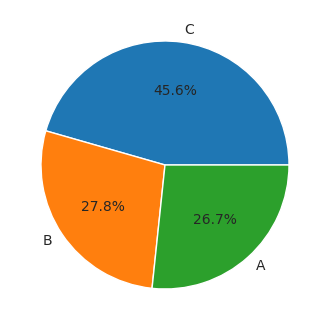

In [391]:
#ABC-анализ - доля клиентов
sns.set_style('whitegrid')
plt.figure(figsize=(4,6))
plt.pie(abc_df.abc.value_counts(), labels = abc_df.abc.value_counts().index, autopct='%1.1f%%')
#plt.title('ABC-анализ - доля клиентов')
plt.show()

In [392]:
#добавление столбца abc в датасет
df = df.merge(abc_df[['abc', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df.shape

(2172, 30)

In [393]:
#xyz анализ (по клиентам)
#создание сводной таблицы с суммой продаж по клиентам по месяцам
xyz_df = df.groupby(['Year','Month', 'CustomerID'])['OrderID'].agg('count').reset_index()
xyz_df = xyz_df.pivot_table(values = 'OrderID', index = 'CustomerID', columns = ['Year', 'Month']).fillna(0).reset_index()
xyz_df.head(5)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...    6    7   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 6.00 4.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   
3              4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 2.00 0.00   
4              5 0.00 0.00 0.00 0.00 4.00 0.00 0.00 0.00 5.00  ... 6.00 0.00   

Year                            2013            
Month     8    9   10   11   12    1    2    3  
0     11.00 0.00 0.00 6.00 0.00 1.00 2.00 4.00  
1      0.00 0.00 0.00 4.00 0.00 0.00 0.00 0.00  
2      0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00  
3      0.00 2.00 3.00 0.00 0.00 0.00 0.00 0.00  
4      0.00 3.00 3.00 0.00 0.00 0.00 0.00 0.00  

[5 rows x 46 columns]

In [394]:
std_demand = xyz_df.std(axis = 1)
std_demand

0     3.09
1     0.83
2     1.15
3     0.83
4     1.83
      ... 
85   12.97
86   13.12
87   13.27
88   13.41
89   18.71
Length: 90, dtype: float64

In [395]:
avg = xyz_df.mean(axis=1)
avg


0    1.80
1    0.26
2    0.43
3    0.26
4    1.24
     ... 
85   1.93
86   2.80
87   2.02
88   2.33
89   2.93
Length: 90, dtype: float64

In [396]:
xyz_df['std'] = std_demand
xyz_df['mean'] = avg
xyz_df['cov'] = xyz_df['std']/xyz_df['mean']
xyz_df.head(3)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...    9   10   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 0.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   

Year            2013            std mean  cov  
Month   11   12    1    2    3                 
0     6.00 0.00 1.00 2.00 4.00 3.09 1.80 1.71  
1     4.00 0.00 0.00 0.00 0.00 0.83 0.26 3.17  
2     0.00 0.00 0.00 0.00 2.00 1.15 0.43 2.64  

[3 rows x 49 columns]

In [397]:
xyz_df['cov'].max()

6.70486343249353

In [398]:
xyz_df['cov'].min()

1.3811574935349966

In [399]:
def xyz_group (cov):
  if cov <= 0.1:
        return 'X'
  elif cov > 0.1 and cov <= 0.25:
        return 'Y'
  else:
        return 'Z'

In [400]:
xyz_df['xyz'] = xyz_df['cov'].apply(xyz_group)
xyz_df.head(5)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...   10   11   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 6.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 4.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   
3              4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 3.00 0.00   
4              5 0.00 0.00 0.00 0.00 4.00 0.00 0.00 0.00 5.00  ... 3.00 0.00   

Year       2013            std mean  cov xyz  
Month   12    1    2    3                     
0     0.00 1.00 2.00 4.00 3.09 1.80 1.71   Z  
1     0.00 0.00 0.00 0.00 0.83 0.26 3.17   Z  
2     0.00 0.00 0.00 2.00 1.15 0.43 2.64   Z  
3     0.00 0.00 0.00 0.00 0.83 0.26 3.17   Z  
4     0.00 0.00 0.00 0.00 1.83 1.24 1.48   Z  

[5 rows x 50 columns]

In [401]:
xyz_df.columns = xyz_df.columns.droplevel('Month')


In [402]:
xyz_df.xyz.unique()

array(['Z'], dtype=object)

In [403]:
xyz_df.columns.get_level_values(0)

Index(['CustomerID',         2009,         2009,         2009,         2009,
               2009,         2009,         2010,         2010,         2010,
               2010,         2010,         2010,         2010,         2010,
               2010,         2010,         2010,         2010,         2011,
               2011,         2011,         2011,         2011,         2011,
               2011,         2011,         2011,         2011,         2011,
               2011,         2012,         2012,         2012,         2012,
               2012,         2012,         2012,         2012,         2012,
               2012,         2012,         2012,         2013,         2013,
               2013,        'std',       'mean',        'cov',        'xyz'],
      dtype='object', name='Year')

In [404]:
#добавление столбца abc в датасет
df = df.merge(xyz_df[['xyz', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df.shape

(2172, 31)

In [405]:
df.head(3)

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID ProductID  \
0   10248 2012-10-01     10  2012          4          2         2        11   
1   10248 2012-10-01     10  2012          4          2         2        42   
2   10248 2012-10-01     10  2012          4          2         2        72   

   Sales  Costs  ...   EmployeeName   HireDate  Office  ReportsTo      Title  \
0 343.44 284.37  ...  Elvis Presley 1993-09-14       1       2.00  President   
1 140.40 116.25  ...  Elvis Presley 1993-09-14       1       2.00  President   
2  63.55  52.62  ...  Elvis Presley 1993-09-14       1       2.00  President   

  YearSalary  Churn Discount_perc abc xyz  
0      80000     No          0.00   C   Z  
1      80000     No          0.00   C   Z  
2      80000     No          0.00   C   Z  

[3 rows x 31 columns]

In [406]:
df['Group_ABCXYZ'] = df[['abc', 'xyz']].agg(''.join, axis = 1)
df = df.drop(['abc', 'xyz'], axis =1)
df.head(5)

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID ProductID  \
0   10248 2012-10-01     10  2012          4          2         2        11   
1   10248 2012-10-01     10  2012          4          2         2        42   
2   10248 2012-10-01     10  2012          4          2         2        72   
3   10249 2011-10-01     10  2011         79          7         2        14   
4   10249 2011-10-01     10  2011         79          7         2        51   

    Sales   Costs  ...  SupplierCountry   EmployeeName   HireDate  Office  \
0  343.44  284.37  ...            Spain  Elvis Presley 1993-09-14       1   
1  140.40  116.25  ...        Singapore  Elvis Presley 1993-09-14       1   
2   63.55   52.62  ...            Italy  Elvis Presley 1993-09-14       1   
3  205.20  169.91  ...            Japan   Tom Lindwall 1995-11-22       2   
4 4048.00 3642.67  ...        Australia   Tom Lindwall 1995-11-22       2   

   ReportsTo                 Title  YearSalary Churn Discount_perc  \
0       2.00             President       80000    No          0.00   
1       2.00             President       80000    No          0.00   
2       2.00             President       80000    No          0.00   
3       4.00  Sales Representative       61000    No          0.00   
4       4.00  Sales Representative       61000    No          0.00   

  Group_ABCXYZ  
0           CZ  
1           CZ  
2           CZ  
3           AZ  
4           AZ  

[5 rows x 30 columns]

In [407]:
#порядок столбцов
my_cols = ['OrderID', 'OrderDate', 'Month', 'Year', 'CustomerID', 'ProductID', 'Group_ABCXYZ',  'Product', 'CategoryID', 'Category', 'SupplierID', 'Supplier', 'SupplierContact', 'SupplierCountry','Sales', 'Costs', 'Profit', 'Quantity',  'Discount_perc',
       'Discount', 'Freight', 'CustomerID', 'Churn',  'EmployeeID','EmployeeName', 'Title', 'Office', 'ReportsTo',
       'YearSalary', 'HireDate']
df_full = df[my_cols]
df_full.shape

(2172, 30)

In [408]:
#выгрузка полного датасета в эксель
#df_full.to_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/FashionStore_full.xlsx', index = False)

In [409]:
#загрузка дф в BigQuery
#BqDatasetwithtable= 'case3.fashion_store_'
#BqProject='careful-griffin-327321'
#df_full.to_gbq(BqDatasetwithtable, BqProject)

# Анализ оттока клиентов

In [410]:
df_churn = df.loc[df['Churn']=='Yes']
#df_churn
df_churn.CustomerID.nunique()

25

In [411]:
# доля ушедших клиентов
df_churn.CustomerID.nunique()/df.CustomerID.nunique()

0.2777777777777778

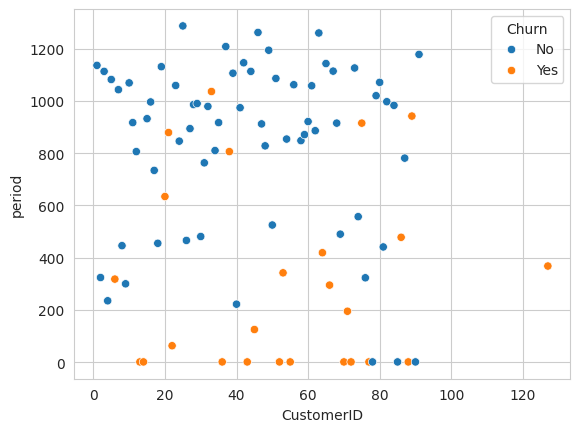

In [412]:
clients_period = df.groupby('CustomerID').agg({'OrderDate':[min,max], 'Churn':'first'}).reset_index()
clients_period.columns=clients_period.columns.droplevel(0) #избавляемся от мультиндексов в шапке
clients_period['period']= (clients_period['max'] - clients_period['min']).dt.days+1 #период обслуживания в днях
clients_period.columns.values[0] = 'CustomerID' #переименование столбца по индексу
clients_period.columns.values[3] = 'Churn'

data = clients_period[['CustomerID', 'period', 'Churn']]
sns.scatterplot(x='CustomerID', y='period', data=data, hue='Churn')
plt.show()

In [413]:
clients_period['period'].loc[clients_period['Churn']=='Yes'].value_counts()

1       10
318      1
634      1
879      1
63       1
1036     1
806      1
125      1
342      1
419      1
295      1
195      1
915      1
478      1
942      1
368      1
Name: period, dtype: int64

Значительная доля клиентов, которые ушли, совершали покупки в течение 1 дня (40%). Для дальнейшего анализа целесообразно разделить клиентов на группы с заданными интервалами.

In [414]:
#периоды обслуживания
clients_period['clients_period'] = np.where(clients_period['period'] == 1, 1, #1 день
                                            np.where((clients_period['period'] > 1) & (clients_period['period'] <=180), 2, #до полугода
                                                     np.where((clients_period['period'] >180) & (clients_period['period'] <=366), 3, #до года
                                                              np.where((clients_period['period'] >366) & (clients_period['period'] <=732), 4,5)))) #до 2х лет, более
#clients_period.sample(10)
clients_period['clients_period'].value_counts(normalize=True).sort_values(ascending=False)

5   0.60
1   0.14
4   0.13
3   0.10
2   0.02
Name: clients_period, dtype: float64

In [415]:
#сумма продаж по клиентам
sales_to_cus = df.groupby('CustomerID').agg({'Sales':sum, 'OrderID':'nunique'}).reset_index()
sales_to_cus = sales_to_cus.rename(columns = {'Sales':'Sales_to_Cus', 'OrderID':'OrderCounts'})
sales_to_cus.sort_values(by = 'Sales_to_Cus', ascending=False)

CustomerID  Sales_to_Cus  OrderCounts
61          63     201320.46           36
18          19     152114.80           43
36          37     131133.18           48
22          23      91362.15           26
31          32      82519.85           42
..         ...           ...          ...
42          43        263.70            1
52          53        236.83            2
68          70        193.36            1
12          13        105.77            1
85          88         66.00            1

[90 rows x 3 columns]

In [416]:
sales_to_cus[['Sales_to_Cus', 'OrderCounts']].describe()

Sales_to_Cus  OrderCounts
count         90.00        90.00
mean       19812.75         9.29
std        33588.47        10.13
min           66.00         1.00
25%         2173.42         3.00
50%         8120.72         5.00
75%        21055.40        12.00
max       201320.46        48.00

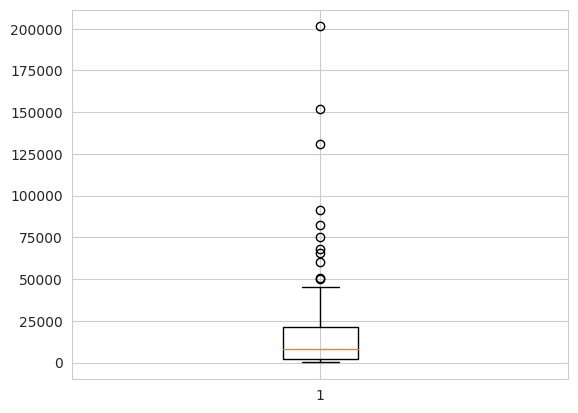

In [417]:
plt.boxplot(sales_to_cus['Sales_to_Cus'])
plt.show()

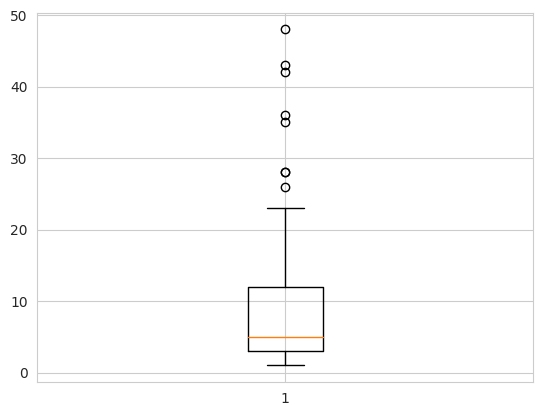

In [418]:
plt.boxplot(sales_to_cus['OrderCounts'])
plt.show()

In [419]:
#разделение всех клиентов на квинтили по общему доходу и по количеству заказов (ещё вариант pd.bin - бининг с равными интервалами)
labels5 = [1,2,3,4,5]
sales_to_cus['Sales_bins'] = pd.qcut(sales_to_cus['Sales_to_Cus'], q=5, labels = labels5)
sales_to_cus['Orders_bins'] = pd.qcut(sales_to_cus['OrderCounts'], q=5, labels = labels5)
sales_to_cus

CustomerID  Sales_to_Cus  OrderCounts Sales_bins Orders_bins
0            1      75153.54           35          5           5
1            2       1015.88            4          1           2
2            3       8984.93            7          3           3
3            4       6688.34            4          3           2
4            5      39838.91           18          5           5
..         ...           ...          ...        ...         ...
85          88         66.00            1          1           1
86          89      22721.60           14          4           4
87          90        442.77            1          1           1
88          91       3977.18            7          2           3
89         127       6528.14            3          3           2

[90 rows x 5 columns]

In [420]:
#добавление столбцов с бинами в дф
df = df.merge(sales_to_cus, on = 'CustomerID', how = 'left')
df = df.merge(clients_period, on = 'CustomerID', how = 'left')
df = df.drop(['Sales_to_Cus', 'OrderCounts', 'min', 'max', 'Churn_y', 'period'], axis =1)
df.head(1)

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID ProductID  \
0   10248 2012-10-01     10  2012          4          2         2        11   

   Sales  Costs  ...  Office  ReportsTo      Title  YearSalary  Churn_x  \
0 343.44 284.37  ...       1       2.00  President       80000       No   

  Discount_perc  Group_ABCXYZ Sales_bins Orders_bins clients_period  
0          0.00            CZ          3           2              3  

[1 rows x 33 columns]

## Оценка распределений и корреляций (EDA, отбор параметров для ML)

In [421]:
#отбор столбцов для дальнейшего анализа данных и ML, удаление столбцов, не вносящих нов.информации
df_ml = df.drop(['ProductID', 'OrderID','CategoryID', 'SupplierID', 'OrderDate','Year','HireDate','EmployeeID','Title','YearSalary','SupplierContact','SupplierCountry','Freight','ShipperID', 'Month'], axis=1)
df_ml.head(1)

CustomerID  Sales  Costs  Profit  Quantity  Discount          Product  \
0          4 343.44 284.37   59.07        12      0.00  Desperado Jeans   

        Category            Supplier   EmployeeName Office ReportsTo Churn_x  \
0  Men´s Clothes  Los Hombres Machos  Elvis Presley      1      2.00      No   

   Discount_perc Group_ABCXYZ Sales_bins Orders_bins  clients_period  
0           0.00           CZ          3           2               3

In [422]:
#преобразование ABCXYZ в  числовой (метод replace)
abc_nums = {'AX':1, 'AY':2, 'AZ':3, 'BX':4, 'BY':5, 'BZ':6, 'CX':7, 'CY':8, 'CZ':9}
df_ml = df_ml.replace(abc_nums)
#изменение типов
df_ml['Sales_bins'] = df_ml['Sales_bins'].astype(int)
df_ml['Orders_bins'] = df_ml['Orders_bins'].astype(int)
df_ml.head(3)

CustomerID  Sales  Costs  Profit  Quantity  Discount          Product  \
0           4 343.44 284.37   59.07        12      0.00  Desperado Jeans   
1           4 140.40 116.25   24.15        10      0.00     Balett Shoes   
2           4  63.55  52.62   10.93         5      0.00     Rossi Shorts   

          Category             Supplier   EmployeeName  Office  ReportsTo  \
0    Men´s Clothes   Los Hombres Machos  Elvis Presley       1       2.00   
1  Ladies´Footwear  Asin Fashion Ltd Co  Elvis Presley       1       2.00   
2     Bath Clothes      Ravenna Fashion  Elvis Presley       1       2.00   

  Churn_x  Discount_perc  Group_ABCXYZ  Sales_bins  Orders_bins  \
0      No           0.00             9           3            2   
1      No           0.00             9           3            2   
2      No           0.00             9           3            2   

   clients_period  
0               3  
1               3  
2               3

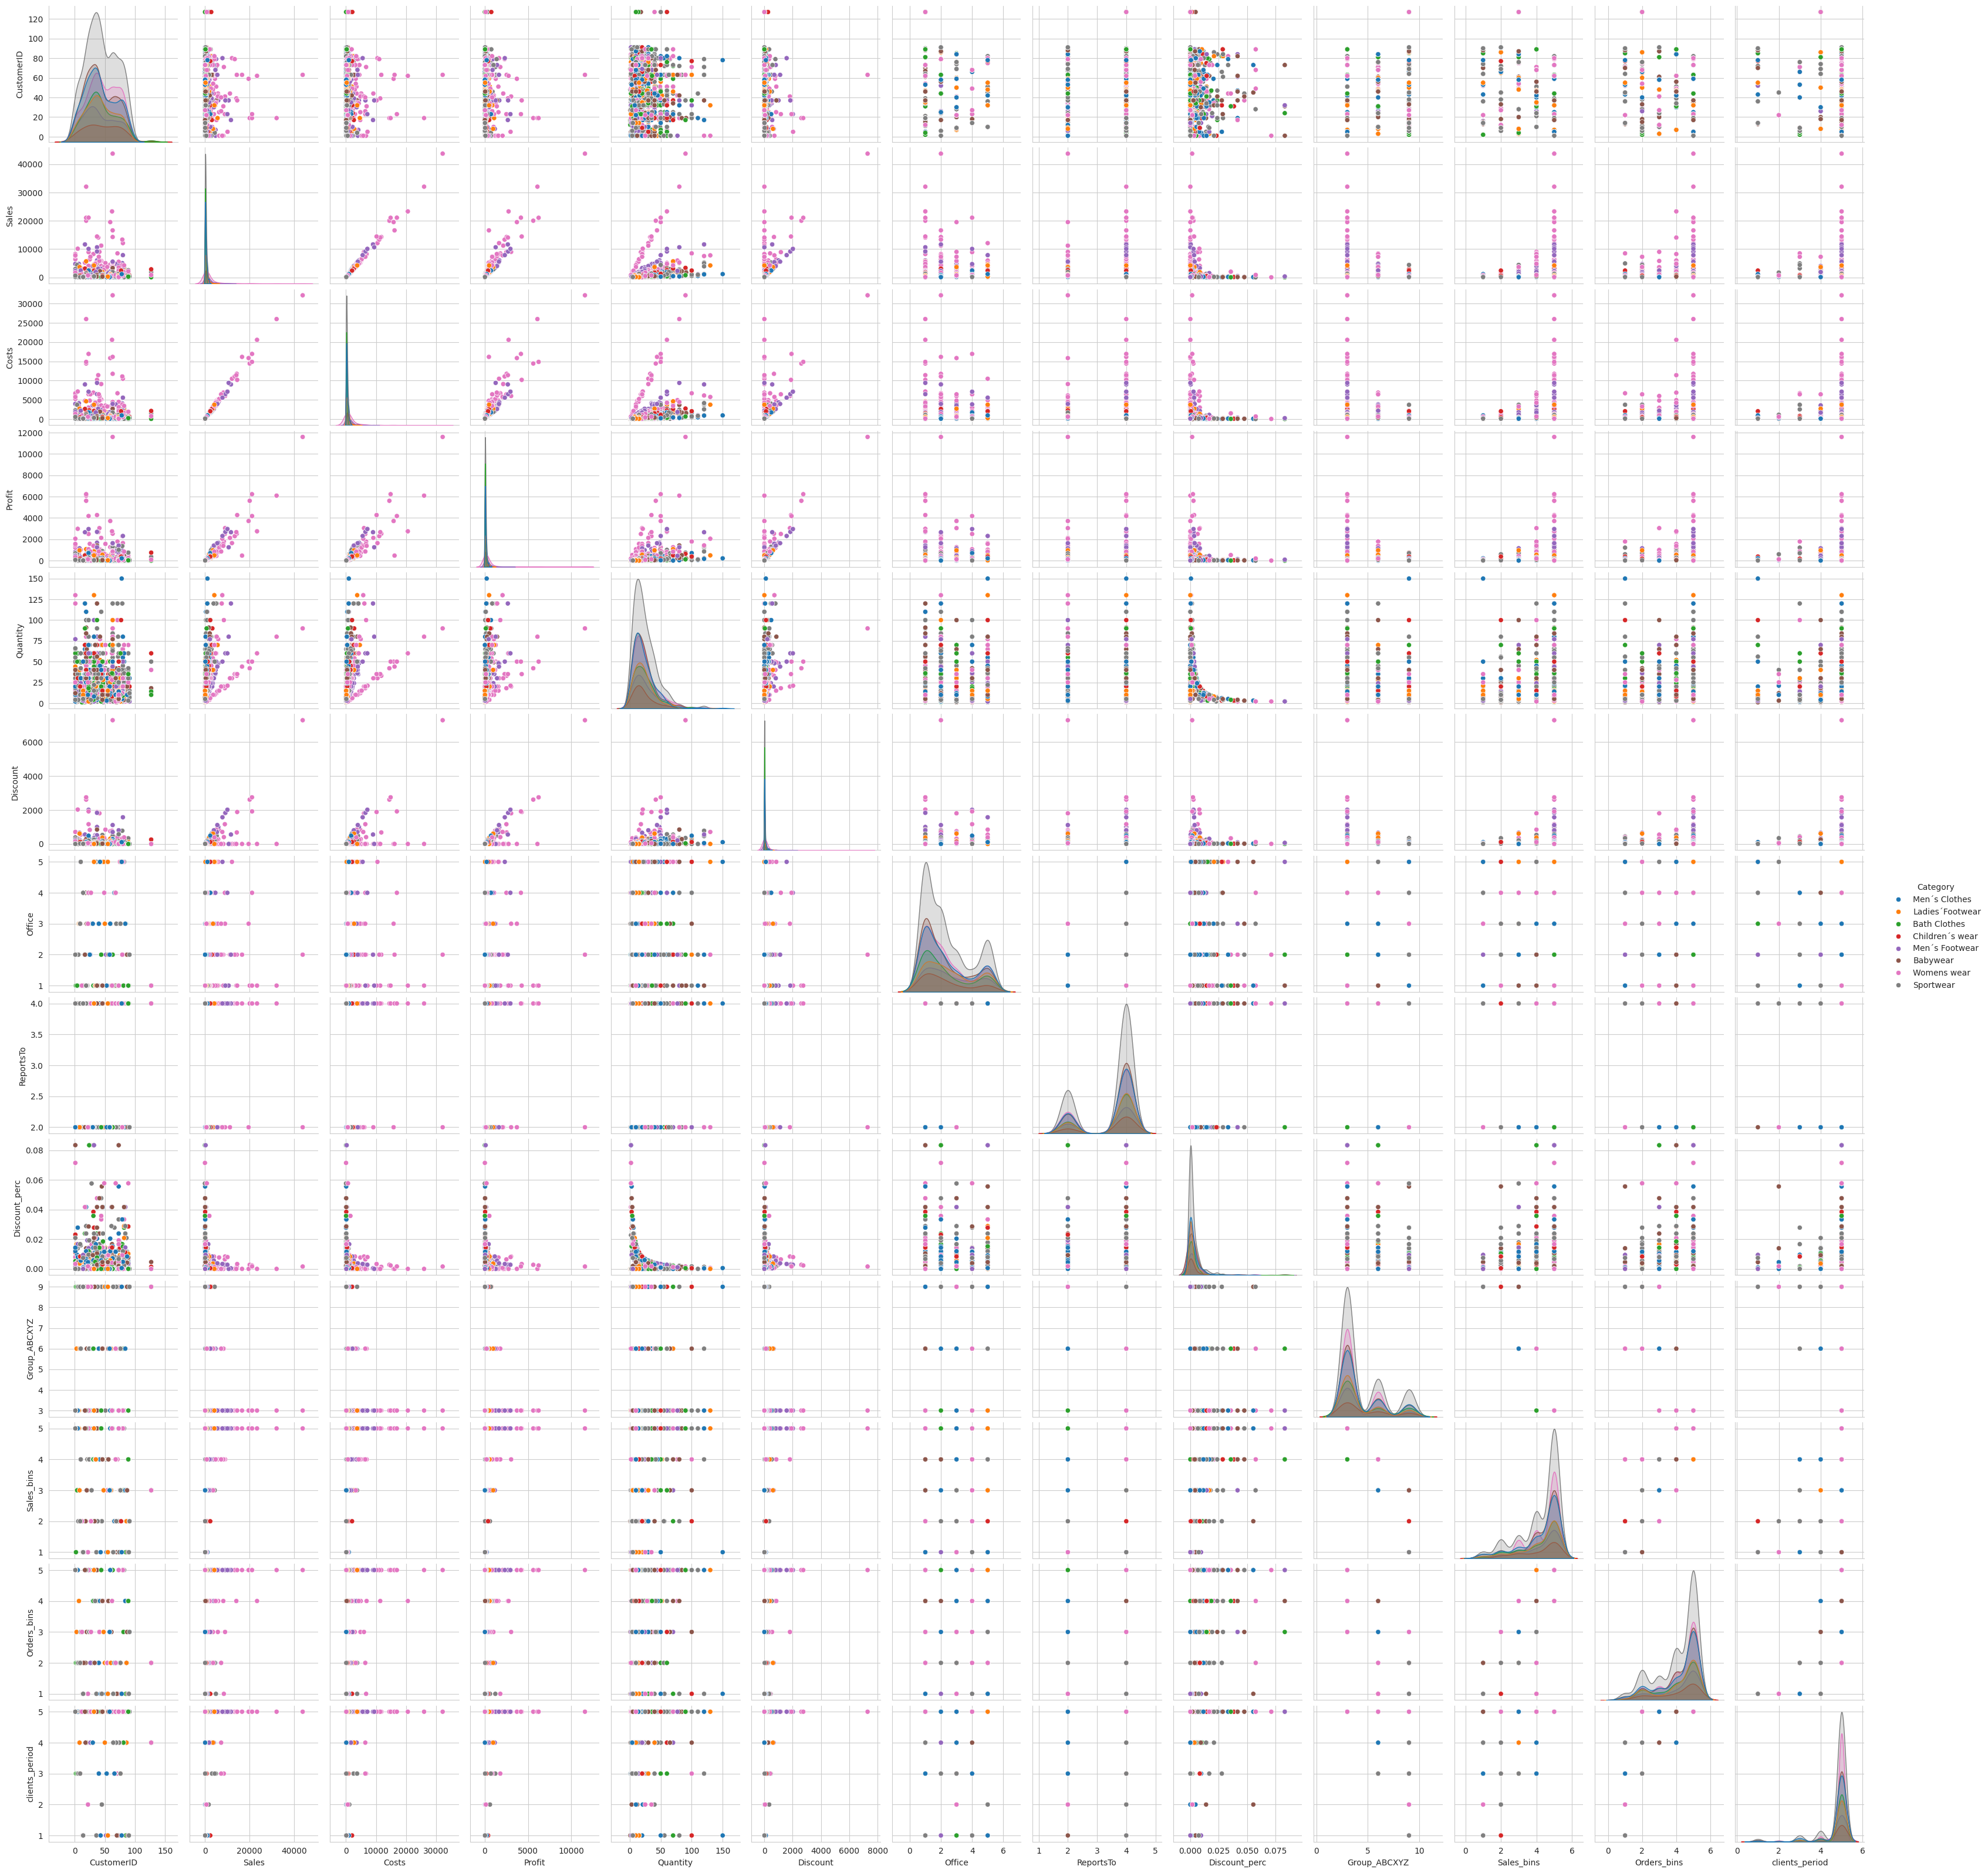

In [423]:
#анализ распределений
sns.pairplot(df_ml, hue="Category")

In [424]:
!pip install -U dataprep

In [425]:
from dataprep.eda import *


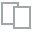
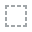
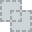
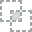
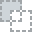
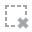
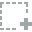
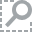
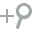
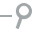
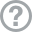
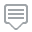
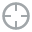
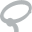
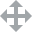
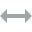
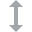
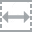
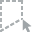
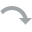
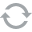
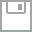
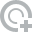
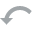
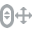
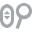
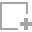
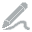
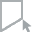
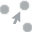
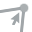
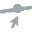

In [426]:
plot(df_ml)

<ipython-input-427-626c367f2232>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ml.corr(),annot = True)


<Axes: >

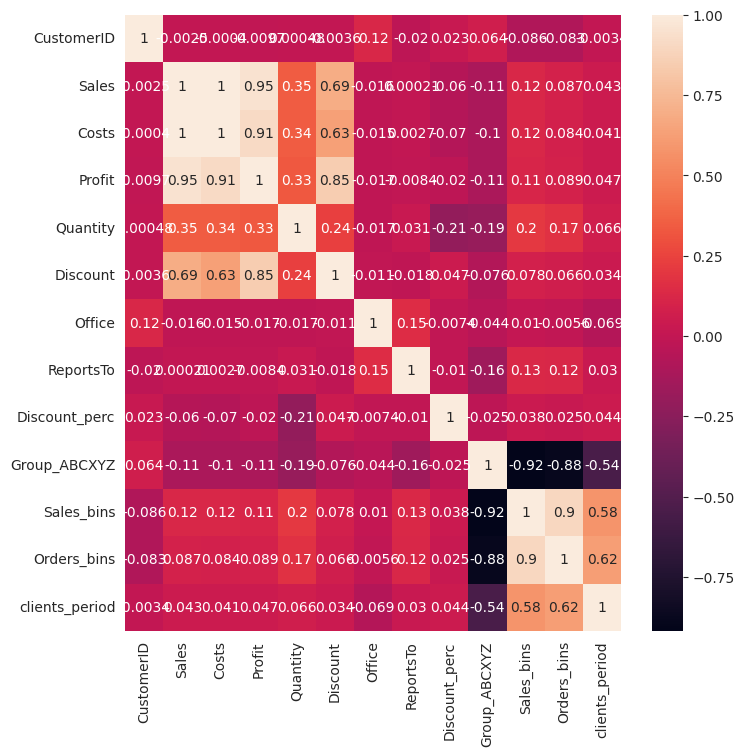

In [427]:
plt.figure(figsize = (8,8))
sns.heatmap(df_ml.corr(),annot = True)

Датасет представляет отчёт о деятельности магазина одежды за период июль 2009г. - март 2013г. (44 мес.). Орг.структура отдела продаж состоит из 4 офисов, ответсвенными за продажи являются 7 сотрудников, каждый из которыз работает в компании более 10 лет.
Компания  реализует продукцию 8 категорий товаров, наиболее популярной являются Спорттовары (по количнеству заказов), наибольшую выручку приносит категория Женская одежда.
Вырвженной сезонности нет.
В компании действует система скидок: средняя скидка составляет 4%, максимальная - 17,5%. Наиболее часто встречается реализация без скидок. Действующая программа дояльности требует дальнейшего анализа.
В ходе ABC и XYZ анализа выявлено, что 27% клиентов относятся к группе А и обеспечивают 80% выручки. Все клиенты относятся к группе Z. Одной из причин может быть то, что частота покупки данных категорий товаров невысокая. Для более глубокого анализа требуется оптимизация параметров.
Анализ оттока клиентов показывает, что доля ушедших клиентов составляет 28%. Среди них 40% совершали заказы в течение одного дня, совершали разовые покупки. Более половины всех клиентов магазина за исследуемый период сотрудничают с компанией более 2 лет. Для углубленной сегментации клиентов представляют интерес частота покупки, объем дохода за сопоставимый период (для клиентов, совершивших более 1 заказа), продуктовый профиль, условия программы лояльности.
Для дальнейшего машинного обучения (прогноз оттока клиентов) из датасета должны быть удалены высококоррелируемые признаки (Sales, Profit, Costs, бины по выручке и кол-ву заказов, скидка в абс.выражении, период обслуживания), инфрмация должна быть сгруппирована по клиентам, а также добавлены новые признаки по клиентам.


# Визуальная аналитика Tableu

In [428]:
%%html
<div class='tableauPlaceholder' id='viz1635425506584' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_fin&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635425506584');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [429]:
%%html
<div class='tableauPlaceholder' id='viz1635432389653' style='position: relative'><noscript><a href='#'><img alt='Story 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_supp_&#47;Story2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432389653');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

** В Story 3 для чарта Group_ABCXYZ использована другая методика расчета, внести правки невозможно из-за отсутствия доступа в Tableu

In [430]:
%%html
<div class='tableauPlaceholder' id='viz1635432542528' style='position: relative'><noscript><a href='#'><img alt='Story 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_custom_&#47;Story3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432542528');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [431]:
#PowerBI - студенческая учетная запись, нет доступа
%%html
<iframe width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=734ddb82-92b1-4b45-81cf-65082ba0db15&autoAuth=true&ctid=c8c69aae-32ba-43d1-9f59-f98c95fb227b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXdlc3QtZXVyb3BlLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9" frameborder="0" allowFullScreen="true"></iframe>